# Amino Acid distributions per variant

Authored by Arjun Aditham (7/2024)

This notebook produces statistics used for calculating the number of variants for each library, and then also analyses the source file to generate distributions for number of amino acid mutations per variant. This notebook produces Figures S1C and S1D. Note: this notebook was previously run from another directory and has since been moved. The outputs of the notebook below are preserved.


In [ ]:
#import dependencies.

import pandas as pd
from matplotlib import pyplot as pl
import seaborn as sb
import numpy as np
import matplotlib.cm as cm
import scipy.stats
from matplotlib.colors import ListedColormap
import math


In [2]:
variants = pd.read_csv('../results/variants/codon_variants.csv');

#establish libraries
library = ['A','B'];


#make a funtion that just says if something contains an indel
def identify_indel(sub_list):
    #cast as string
    sublist_str = str(sub_list);
    if ('-' in sublist_str):
        return True
    else:
        return False


#loop through list and collect barcode numbers
for i in library:
    subset = variants[variants['library']==i];
    subset = subset[subset['target']=='gene']
    
    #make another column for 'indel' to check for indels and eliminate
    subset['indel_present'] = subset['aa_substitutions'].apply(lambda x: identify_indel(x));
    
    #okay filter to remove indels
    subset=subset[subset['indel_present']==False]
    
    barcodes = subset.barcode.unique().tolist();
    print('Library '+i+' barcodes '+ str(len(barcodes)))

#barcode counts from pipeline: A=83706 B=89327

Library A barcodes 83706
Library B barcodes 89327


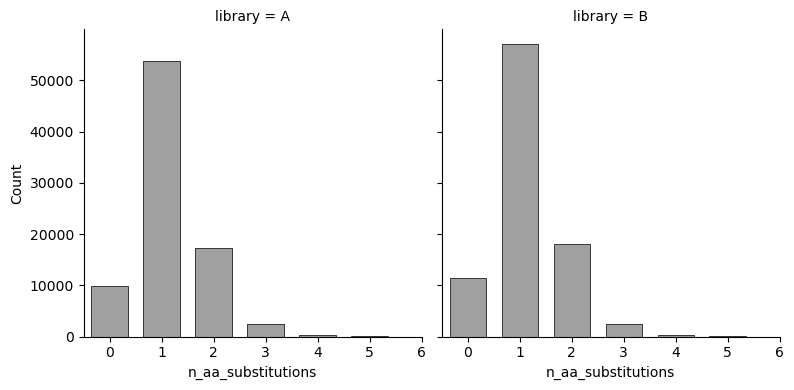

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [5]:
#okay let's do the facetgrid of plots. I want this in seaborn style for aesthetic control

g = sb.FacetGrid(variants, col="library", col_wrap=2, height=4)

# Map the scatterplot to the FacetGrid
g = g.map(sb.histplot, 'n_aa_substitutions',kde=False,discrete=True,shrink=0.7, color='gray')

pl.xlim(-0.5,6)
pl.xticks([0,1,2,3,4,5,6])

pl.ylabel('Number of Variants')
# Show plot
pl.show()

#suppress output for deposition of notebooks
#g.savefig('240726_aa-distributions.eps')

In [6]:
#okay now let's calculate the number of unique mutants in the library using this filtered dataframe.

list_muts = [];


def is_nan(value):
    return isinstance(value, float) and math.isnan(value)


for i in library:
    subset = variants[variants['library']==i];
    subset = subset[subset['target']=='gene'];
    
    #make another column for 'indel' to check for indels and eliminate
    subset['indel_present'] = subset['aa_substitutions'].apply(lambda x: identify_indel(x));
    
    #okay filter to remove indels
    subset=subset[subset['indel_present']==False]
    
    #okay let's just make a list of what remains and work with that.
    list_of_all_mutants = subset.aa_substitutions.tolist();
    print('before processing Lib' + i + ' substitution array count ' + str(len(list_of_all_mutants)));
    
    #filter out all NaN
    list_of_all_mutants = [x for x in list_of_all_mutants if not is_nan(x)];
    print('remove NaN (unmutated) Lib' + i + ' substitution array count ' + str(len(list_of_all_mutants)));
    
    #filter out all stop codons
    list_of_all_mutants = [x for x in list_of_all_mutants if not '*' in str(x)];
    print('purge stop codons Lib' + i + ' substitution array count ' + str(len(list_of_all_mutants)));
    
    #I want to now take the list of list of mutants and convert it into a singular array with all elements
    all_muts_listed = [];
    
    for i in list_of_all_mutants:
        #okay need to split this down by ' ' delimiting
        split_list = i.split(' ')
        for j in split_list:
            all_muts_listed.append(j);
    
    print('All mutants collapsed to single list: ' + str(len(all_muts_listed)));
    
    #purge duplicate listings
    cleaned_data = list(set(all_muts_listed));
    print('purge duplicates of single mutants: ' + str(len(cleaned_data)));
    
    
    #okay, so now we have all individual mutants, but we need to isolate for which ones are in ectodomain (resi 18-450).
    #This is handwavey but because of numbering convention, the residue numbers need to be subtracted by 17. So I should
    #check for residues within 1-433.
    
    list_ectodomain_mutants = [x for x in cleaned_data if int(x[1:-1])>=1 and int(x[1:-1])<=433];
    print('ectodomain single mutants: ' + str(len(list_ectodomain_mutants)));
    
    
    #okay purge for mutants in ectodomain only?

    
    print()
    
    

    
    



before processing LibA substitution array count 83706
remove NaN (unmutated) LibA substitution array count 73759
purge stop codons LibA substitution array count 72681
All mutants collapsed to single list: 94542
purge duplicates of single mutants: 8207
ectodomain single mutants: 8207

before processing LibB substitution array count 89327
remove NaN (unmutated) LibB substitution array count 77967
purge stop codons LibB substitution array count 76862
All mutants collapsed to single list: 99686
purge duplicates of single mutants: 8200
ectodomain single mutants: 8200



In [86]:
433*19

8227